In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
columnsUsers=['UserID','Gender','Age','OccupationNo','Zip-code']
columnRatings=['UserID','MovieID','Rating','Timestamp']
columnMovies=['MovieID','Title','Genres']

In [3]:
df_users=pd.read_table(r'C:\Users\user\Desktop\Learning\Jupyter Workspace\Project\Data science with Python 1\users.dat',
                        sep='::',header=None,
                        names=columnsUsers)


df_ratings=pd.read_table(r'C:\Users\user\Desktop\Learning\Jupyter Workspace\Project\Data science with Python 1\ratings.dat',
                        sep='::',header=None,
                        names=columnRatings)


df_movies=pd.read_table(r'C:\Users\user\Desktop\Learning\Jupyter Workspace\Project\Data science with Python 1\movies.dat',
                        sep='::',header=None,
                        names=columnMovies)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pytho

In [4]:
df_users['AgeGroup'] = pd.cut(x=df_users['Age'],
                              bins=[0,1,18,25,35,45,50,56],labels=['Below 18','18-24','25-34','35-44','45-54','50-55','56+'])

In [5]:
df_users.head()

,UserID,Gender,Age,OccupationNo,Zip-code,AgeGroup
0,1,F,1,10,48067,Below 18
1,2,M,56,16,70072,56+
2,3,M,25,15,55117,25-34
3,4,M,45,7,02460,45-54
4,5,M,25,20,55455,25-34


In [6]:
data = { 'Occupation' : ['other','academic/educator','artist','clerical/admin' , 'college/grad student' , 'customer service' , 'doctor/health care',
        'executive/managerial' , 'farmer' , 'homemaker' , 'K-12 student' , 'lawyer' , 'programmer' , 'retired' , 'sales/marketing' , 'scientist' ,
        'self-employed' , 'technician/engineer' , 'tradesman/craftsman' , 'unemployed' , 'writer'],
        
        'OccupationNo': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# Create the pandas DataFrame 
df_Occupation = pd.DataFrame(data)
df_Occupation

,Occupation,OccupationNo
0,other,0
1,academic/educator,1
2,artist,2
3,clerical/admin,3
4,college/grad student,4
5,customer service,5
6,doctor/health care,6
7,executive/managerial,7
8,farmer,8
9,homemaker,9


In [7]:
df_users=pd.merge(df_users,df_Occupation,on='OccupationNo',how='left')
df_users.head()

,UserID,Gender,Age,OccupationNo,Zip-code,AgeGroup,Occupation
0,1,F,1,10,48067,Below 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,02460,45-54,executive/managerial
4,5,M,25,20,55455,25-34,writer


#### Merging Rating table with user table by UserID

In [8]:
df1=pd.merge(df_ratings,df_users,on='UserID',how='left')

##### Merging dataframe df1 with Movie table by MovieID

In [9]:
df2=pd.merge(df1,df_movies,on='MovieID',how='left') 

In [10]:
df2.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,OccupationNo,Zip-code,AgeGroup,Occupation,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,Below 18,K-12 student,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,Below 18,K-12 student,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,Below 18,K-12 student,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Below 18,K-12 student,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,Below 18,K-12 student,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [11]:
df_MasterData=df2[['MovieID','Title','UserID','Age','AgeGroup','Gender','Occupation','Genres','Rating']]
df_MasterData.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5
1,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,Animation|Children's|Musical,3
2,914,My Fair Lady (1964),1,1,Below 18,F,K-12 student,Musical|Romance,3
3,3408,Erin Brockovich (2000),1,1,Below 18,F,K-12 student,Drama,4
4,2355,"Bug's Life, A (1998)",1,1,Below 18,F,K-12 student,Animation|Children's|Comedy,5


In [12]:
ratings = pd.DataFrame(df_MasterData.groupby('Title')['Rating'].mean())  
  
ratings['num of Ratings'] = pd.DataFrame(df_MasterData.groupby('Title')['Rating'].count()) 

### Top 25 Movies by viewership Rating

In [13]:
ratings.sort_values(['num of Ratings'], ascending = False).head(25)

,Rating,num of Ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


### User Age distribution

In [14]:
#df1['AgeGroup'].value_counts().drop_duplicates(['UserID','Age','AgeGroup','Gender','Occupation'])
df1=df_MasterData.drop_duplicates(['UserID','Age','AgeGroup','Gender','Occupation'], keep='last')

##### Tabular representation

In [15]:
df1['AgeGroup'].value_counts()

25-34       2096
35-44       1193
18-24       1103
45-54        550
50-55        496
56+          380
Below 18     222
Name: AgeGroup, dtype: int64

##### Graphical representation

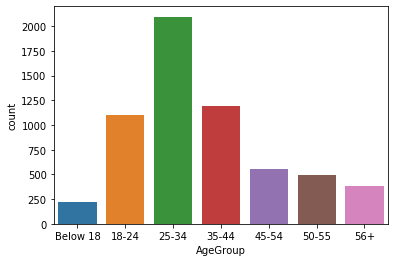

In [16]:
sns.countplot(x='AgeGroup',data=df1)

### User rating of the Movie "Toy Story"

##### Tabular representation

In [17]:
df_TS=df_MasterData[df_MasterData['Title']=='Toy Story (1995)']
df_TS['Rating'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

##### Graphical representation

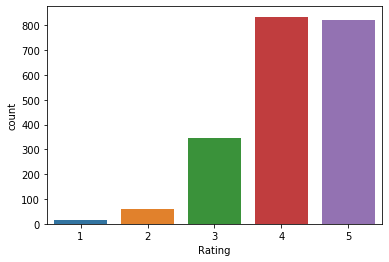

In [18]:
sns.countplot(x='Rating',data=df_TS)

### Ratings of All of the movies rated by the user of userID = 2196

In [19]:
df_userID=df_MasterData[df_MasterData['UserID']==2696]
df_userID

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating
440667,1258,"Shining, The (1980)",2696,25,25-34,M,executive/managerial,Horror,4
440668,1270,Back to the Future (1985),2696,25,25-34,M,executive/managerial,Comedy|Sci-Fi,2
440669,1617,L.A. Confidential (1997),2696,25,25-34,M,executive/managerial,Crime|Film-Noir|Mystery|Thriller,4
440670,1625,"Game, The (1997)",2696,25,25-34,M,executive/managerial,Mystery|Thriller,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,25-34,M,executive/managerial,Horror|Mystery|Thriller,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,25-34,M,executive/managerial,Crime|Horror|Mystery|Thriller,4
440673,1805,Wild Things (1998),2696,25,25-34,M,executive/managerial,Crime|Drama|Mystery|Thriller,4
440674,1892,"Perfect Murder, A (1998)",2696,25,25-34,M,executive/managerial,Mystery|Thriller,4
440675,800,Lone Star (1996),2696,25,25-34,M,executive/managerial,Drama|Mystery,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,25-34,M,executive/managerial,Horror|Mystery|Thriller,2


## Feature Engineering

In [21]:
df_MasterData.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5
1,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,Animation|Children's|Musical,3
2,914,My Fair Lady (1964),1,1,Below 18,F,K-12 student,Musical|Romance,3
3,3408,Erin Brockovich (2000),1,1,Below 18,F,K-12 student,Drama,4
4,2355,"Bug's Life, A (1998)",1,1,Below 18,F,K-12 student,Animation|Children's|Comedy,5


In [44]:
ListofGenres=df_MasterData.Genres.str.split("|")

In [107]:
col=[]

for i in ListofGenres:
    for j in i:
        if j not in col:
            col.append(j)
            
col.append("MovieID")
col.append("Genres")
col.append("Rating")

df2=pd.DataFrame(columns=col)

df3=df_MasterData[["MovieID","Genres","Rating"]]

for index , row in df3.head(2000).iterrows():
    temp=row.Genres.split("|") 
    
    for i in temp:
        #print(a)
        df2.loc[index,i]=1
        df2.loc[index,"MovieID"]=df3.loc[index,"MovieID"]
        df2.loc[index,"Genres"]=df3.loc[index,"Genres"]
        df2.loc[index,"Rating"]=df3.loc[index,"Rating"]
        
    df2.loc[index,df2.columns[~df2.columns.isin(temp+["MovieID","Genres","Rating"])]]=0
    
df2.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,MovieID,Genres,Rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1193,Drama,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,661,Animation|Children's|Musical,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,914,Musical|Romance,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3408,Drama,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2355,Animation|Children's|Comedy,5


### Model - Features affecting the rating of any particular Movie

In [111]:
##Model
X=df2[df2.columns[~df2.columns.isin(["Rating","Genres"])]]
Y=df2.Rating

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [113]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

In [161]:
print( "Prediction Score of the model predicting the features affecting the movie rating : " , round(regr.score(X_train,y_train)*100,2))

Prediction Score of the model predicting the features affecting the movie rating :  6.09


### Model - Prediction of Movie Rating

In [142]:
df_MovieRating=df_MasterData.drop_duplicates(['UserID','Age','AgeGroup','Gender','Occupation'], keep='last')

In [144]:
df_MovieRating.reset_index(inplace=True,drop=True)
df_MovieRating.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating
0,1246,Dead Poets Society (1989),1,1,Below 18,F,K-12 student,Drama,4
1,1247,"Graduate, The (1967)",2,56,56+,M,self-employed,Drama|Romance,5
2,2081,"Little Mermaid, The (1989)",3,25,25-34,M,scientist,Animation|Children's|Comedy|Musical|Romance,4
3,1240,"Terminator, The (1984)",4,45,45-54,M,executive/managerial,Action|Sci-Fi|Thriller,5
4,714,Dead Man (1995),5,25,25-34,M,writer,Western,4


In [146]:
X=df_MovieRating[["MovieID","UserID","Age","Gender"]]
Y=df_MovieRating.Rating

In [149]:
Y.head()

0    4
1    5
2    4
3    5
4    4
Name: Rating, dtype: int64

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

number=LabelEncoder()
X_train.Gender=number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender=number.fit_transform(X_test["Gender"].astype("str"))
y_train=number.fit_transform(y_train.astype("int"))
y_test=number.fit_transform(y_test.astype("int"))

### Linear Regression Model

In [155]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
print("Movie review prediction by Linear Regression Model : " ,round(regr.score(X_train,y_train)*100,2))

Movie review prediction by Linear Regression Model :  6.09


### RandomForest Classifier

In [158]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print("Movie review prediction by Random Forest Classifier Model : " ,round(model.score(X_train,y_train)*100,2))

Movie review prediction by Random Forest Classifier Model :  100.0


### Decision Tree Classifier

In [160]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print("Movie review prediction by Decision Tree Classifier Model : " ,round(model.score(X_train,y_train)*100,2))

Movie review prediction by Decision Tree Classifier Model :  100.0


## Out of 3 Prediction Model  - Decision Tree Classifier gives maximum prediction score

### OLD process

In [85]:
df_MasterData['Action']=pd.np.where(df_MasterData.Genres.str.contains("Action"), 1,0)
df_MasterData['Adventure']=pd.np.where(df_MasterData.Genres.str.contains("Adventure"), 1,0)
df_MasterData['Animation']=pd.np.where(df_MasterData.Genres.str.contains("Animation"), 1,0)
df_MasterData['Children']=pd.np.where(df_MasterData.Genres.str.contains("Children"), 1,0)
df_MasterData['Comedy']=pd.np.where(df_MasterData.Genres.str.contains("Comedy"), 1,0)
df_MasterData['Crime']=pd.np.where(df_MasterData.Genres.str.contains("Crime"), 1,0)
df_MasterData['Documentary']=pd.np.where(df_MasterData.Genres.str.contains("Documentary"), 1,0)
df_MasterData['Drama']=pd.np.where(df_MasterData.Genres.str.contains("Drama"), 1,0)
df_MasterData['Fantasy']=pd.np.where(df_MasterData.Genres.str.contains("Fantasy"), 1,0)
df_MasterData['Film-Noir']=pd.np.where(df_MasterData.Genres.str.contains("Film-Noir"), 1,0)
df_MasterData['Horror']=pd.np.where(df_MasterData.Genres.str.contains("Horror"), 1,0)
df_MasterData['Musical']=pd.np.where(df_MasterData.Genres.str.contains("Musical"), 1,0)
df_MasterData['Mystery']=pd.np.where(df_MasterData.Genres.str.contains("Mystery"), 1,0)
df_MasterData['Romance']=pd.np.where(df_MasterData.Genres.str.contains("Romance"), 1,0)
df_MasterData['Sci-Fi']=pd.np.where(df_MasterData.Genres.str.contains("Sci-Fi"), 1,0)
df_MasterData['Thriller']=pd.np.where(df_MasterData.Genres.str.contains("Thriller"), 1,0)
df_MasterData['War']=pd.np.where(df_MasterData.Genres.str.contains("War"), 1,0)
df_MasterData['Western']=pd.np.where(df_MasterData.Genres.str.contains("Western"), 1,0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
df_MasterData.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,0,...,0,0,0,0,0,0,0,0,0,0
1,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,Animation|Children's|Musical,3,0,...,0,0,0,1,0,0,0,0,0,0
2,914,My Fair Lady (1964),1,1,Below 18,F,K-12 student,Musical|Romance,3,0,...,0,0,0,1,0,1,0,0,0,0
3,3408,Erin Brockovich (2000),1,1,Below 18,F,K-12 student,Drama,4,0,...,0,0,0,0,0,0,0,0,0,0
4,2355,"Bug's Life, A (1998)",1,1,Below 18,F,K-12 student,Animation|Children's|Comedy,5,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X=df_MasterData[['MovieID','Action','Adventure' ,'Animation', 'Children' ,'Comedy', 'Crime' ,'Documentary', 'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery', 'Romance','Sci-Fi','Thriller','War','Western']]
Y=df_MasterData[['Rating']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [98]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
round(regr.score(X_train,y_train)*100,2)

3.89

3.85

In [99]:
idx=['MovieID','Title','UserID','Age','AgeGroup','Gender','Occupation','Genres','Rating']

multi_indexed_df = df_MasterData.set_index(idx)

stacked_df = multi_indexed_df.stack(dropna=False)

long_df = stacked_df.reset_index()

In [100]:
long_df.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating,level_9,0
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Action,0
1,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Adventure,0
2,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Animation,0
3,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Children,0
4,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Comedy,0


In [101]:
long_df=long_df.rename(columns={'level_9':'Genres',0:'Value'})

In [102]:
long_df.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating,Genres,Value
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Action,0
1,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Adventure,0
2,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Animation,0
3,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Children,0
4,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Comedy,0


In [103]:
df_Genre=long_df[long_df['Value']==1]
df_Genre.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating,Genres,Value
7,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,F,K-12 student,Drama,5,Drama,1
20,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,Animation|Children's|Musical,3,Animation,1
21,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,Animation|Children's|Musical,3,Children,1
29,661,James and the Giant Peach (1996),1,1,Below 18,F,K-12 student,Animation|Children's|Musical,3,Musical,1
47,914,My Fair Lady (1964),1,1,Below 18,F,K-12 student,Musical|Romance,3,Musical,1


### Model - Features affecting rating of any movie

TypeError: unhashable type: 'numpy.ndarray'

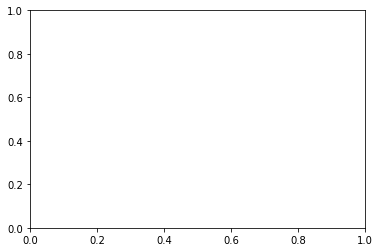

In [110]:
#plt.bar(df_Genre.Genres,df_Genre.Rating)

In [67]:
df_MasterData.head()

,MovieID,Title,UserID,Age,AgeGroup,Gender,Occupation,Genres,Rating,Genres,Value
7,1193,One Flew Over the Cuckoo's Nest (1975),1,1,Below 18,0,K-12 student,Drama,5,Drama,1
20,661,James and the Giant Peach (1996),1,1,Below 18,0,K-12 student,Animation|Children's|Musical,3,Animation,1
21,661,James and the Giant Peach (1996),1,1,Below 18,0,K-12 student,Animation|Children's|Musical,3,Children,1
29,661,James and the Giant Peach (1996),1,1,Below 18,0,K-12 student,Animation|Children's|Musical,3,Musical,1
47,914,My Fair Lady (1964),1,1,Below 18,0,K-12 student,Musical|Romance,3,Musical,1


In [68]:
X=df_MasterData[['MovieID','UserID','Age']]
Y=df_MasterData[['Rating']]

In [78]:
Y.head(inde)

,Rating
7,5
20,3
21,3
29,3
47,3


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

### Linear Regression

In [74]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

In [75]:
regr.score(X_train,y_train)

0.008710515954242104

In [76]:
round(regr.score(X_train,y_train)*100,2)

0.87

### Random Forest Method

In [79]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train.values.ravel())

KeyboardInterrupt: 

In [ ]:
round(model.score(X_train,y_train)*100,2)
actual = y_train
predicted = model.predict(X_train)
accuracy_score(actual,predicted)